# Exploratory Data Analysis

The dataset is about the price of healthcare insurance 

These are the variables taken in consideration:
- age
- sex
- bmi (body mass index) --> a measure of body fat besed on height and weight
- children
- smoker
- region
- charges --> amount paid for the insurance

# Data Cleaning and Preparation

In [59]:
import pandas as pd

In [60]:
path = "/Users/matteomontrucchio/Desktop/insurance.csv"
insurance_df = pd.read_csv(path)

In [61]:
# I will print the first five elements of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
# I used the shape function to get the total number of observation and columns
print(insurance_df.shape)

(1338, 7)


In [63]:
# I used the info function to gain a general insight about the dataframe
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
# I check if there are duplicates
double_df = pd.concat([insurance_df, insurance_df])
print(double_df.shape)

(2676, 7)


In [65]:
final_df = double_df.drop_duplicates()
print(final_df.shape)

(1337, 7)


In [66]:
# Using the drop_duplicates function, I eliminated one observation
# Now there is a total of 1337 observation, while before they were 1338

# Data Exploration

I check for each numerical variable:
- the minimum value
- the maximum value
- the mean value 

I check for each categorical variable:
- number of male and female
- number of smokers and non-smokers
- number of people living in a certain area

I check for each ordinal variable:
- number of children

In [67]:
min_age = min(final_df["age"])
max_age = max(final_df["age"])
age = final_df["age"]
mean_age = age.mean()
mean_age2 = round(mean_age, 2)

min_bmi = min(final_df["bmi"])
max_bmi = max(final_df["bmi"])
bmi = final_df["bmi"]
mean_bmi = bmi.mean()
mean_bmi2 = round(mean_bmi, 2)

min_charges = min(final_df["charges"])
max_charges = max(final_df["charges"])
charges = final_df["charges"]
mean_charges = charges.mean()
mean_charges2 = round(mean_charges, 2)

print(f"minimum age: {min_age}\nmaximum age: {max_age}\naverage age: {mean_age2}")
print()
print(f"minimum bmi: {min_bmi}\nmaximum bmi: {max_bmi}\naverage bmi: {mean_bmi2}")
print()
print(f"minimum charges: {min_charges}\nmaximum charges: {max_charges}\naverage charges: {mean_charges2}")

minimum age: 18
maximum age: 64
average age: 39.22

minimum bmi: 15.96
maximum bmi: 53.13
average bmi: 30.66

minimum charges: 1121.8739
maximum charges: 63770.42801
average charges: 13279.12


In [68]:
counts_sex = final_df["sex"].value_counts()
print(counts_sex)
print()
counts_smoker = final_df["smoker"].value_counts()
print(counts_smoker)
print()
counts_region = final_df["region"].value_counts()
print(counts_region)
print()
counts_children = final_df["children"].value_counts()
print(counts_children)

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


I look for outliers

In [69]:
import numpy as np
import matplotlib.pyplot as plt

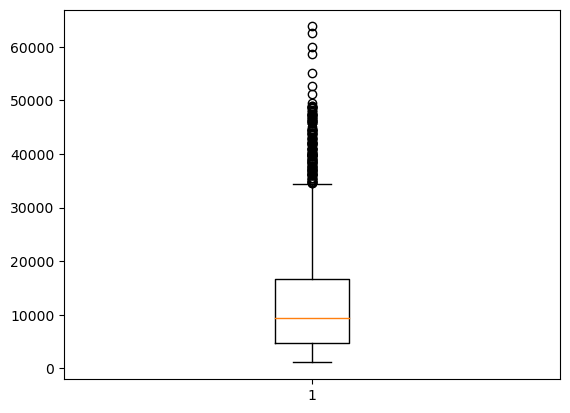

<Figure size 1000x700 with 0 Axes>

In [70]:
plt.boxplot(final_df["charges"])
figure = plt.figure(figsize = (10, 7))
plt.show()

In [71]:
# finding the 1st quartile 
q1 = np.quantile(final_df["charges"], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(final_df["charges"], 0.75)
med = np.median(final_df["charges"])
 
# finding the iqr region
iqr = q3 - q1
 
# finding upper and lower whiskers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
print(iqr, upper_bound, lower_bound)

11911.37345 34524.777625 -13120.716174999998


In [72]:
final2_df = final_df[(final_df["charges"] > lower_bound) & (final_df["charges"] < upper_bound)]
print(final_df.shape)
print(final2_df.shape)

(1337, 7)
(1198, 7)


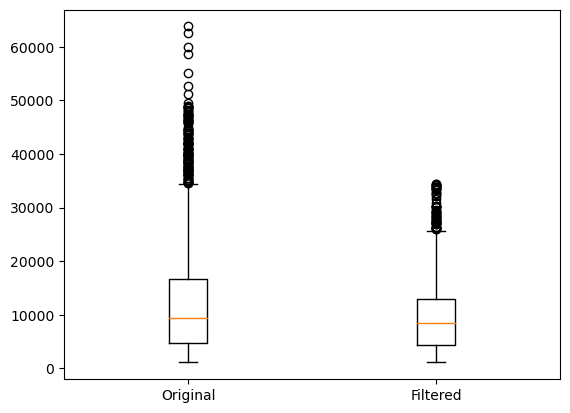

In [73]:
plt.boxplot([final_df["charges"], final2_df["charges"]], labels = ['Original', 'Filtered'])
plt.show()

I repeat again the descriptive statistics calculations using the new dataset

In [74]:
min_age2 = min(final2_df["age"])
max_age2 = max(final2_df["age"])
age2 = final2_df["age"]
mean_age3 = age2.mean()
mean_age4 = round(mean_age3, 2)

min_bmi2 = min(final2_df["bmi"])
max_bmi2 = max(final2_df["bmi"])
bmi2 = final2_df["bmi"]
mean_bmi3 = bmi2.mean()
mean_bmi4 = round(mean_bmi3, 2)

min_charges2 = min(final2_df["charges"])
max_charges2 = max(final2_df["charges"])
charges2 = final2_df["charges"]
mean_charges3 = charges2.mean()
mean_charges4 = round(mean_charges3, 2)

print(f"minimum age: {min_age2}\nmaximum age: {max_age2}\naverage age: {mean_age4}")
print()
print(f"minimum bmi: {min_bmi2}\nmaximum bmi: {max_bmi2}\naverage bmi: {mean_bmi4}")
print()
print(f"minimum charges: {min_charges2}\nmaximum charges: {max_charges2}\naverage charges: {mean_charges4}")

minimum age: 18
maximum age: 64
average age: 39.01

minimum bmi: 15.96
maximum bmi: 53.13
average bmi: 30.09

minimum charges: 1121.8739
maximum charges: 34472.841
average charges: 9934.67


In [75]:
counts_sex2 = final2_df["sex"].value_counts()
print(counts_sex2)
print()
counts_smoker2 = final2_df["smoker"].value_counts()
print(counts_smoker2)
print()
counts_region2 = final2_df["region"].value_counts()
print(counts_region2)
print()
counts_children2 = final2_df["children"].value_counts()
print(counts_children2)

sex
female    612
male      586
Name: count, dtype: int64

smoker
no     1060
yes     138
Name: count, dtype: int64

region
southeast    307
northwest    304
northeast    296
southwest    291
Name: count, dtype: int64

children
0    521
1    292
2    206
3    138
4     23
5     18
Name: count, dtype: int64


I explore the relationship between variables

I will transform categorical data into binary values:
- sex: 0 for male and 1 for female
- smoker: 0 for yes and 1 for no
- regions: southeast is 0, southwest is 1, northwest is 2, northeast is 3

In [76]:
final2_df["sex"] = final2_df["sex"].map({"male" : 0, "female" : 1})
final2_df["smoker"] = final2_df["smoker"].map({"yes" : 0, "no" : 1})
final2_df["region"] = final2_df["region"].map({"southeast" : 0, "southwest" : 1, "northwest" : 2, "northeast" : 3})
final2_df.head()

/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_58615/1379240637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2_df["sex"] = final2_df["sex"].map({"male" : 0, "female" : 1})
/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_58615/1379240637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2_df["smoker"] = final2_df["smoker"].map({"yes" : 0, "no" : 1})
/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_58615/1379240637.py:3: SettingWithCopyWarning: 
A value is t

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


I create a correlation heat map

In [77]:
import seaborn as sns

In [78]:
final2_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020067,0.119704,0.039201,0.067880,0.009327,0.436891
sex,0.020067,1.000000,-0.027310,-0.013903,0.013063,0.000162,0.023405
bmi,0.119704,-0.027310,1.000000,0.002798,0.255572,-0.243698,-0.066453
children,0.039201,-0.013903,0.002798,1.000000,0.005922,-0.003158,0.082932
smoker,0.067880,0.013063,0.255572,0.005922,1.000000,-0.030676,-0.602238
region,0.009327,0.000162,-0.243698,-0.003158,-0.030676,1.000000,0.074523
charges,0.436891,0.023405,-0.066453,0.082932,-0.602238,0.074523,1.000000


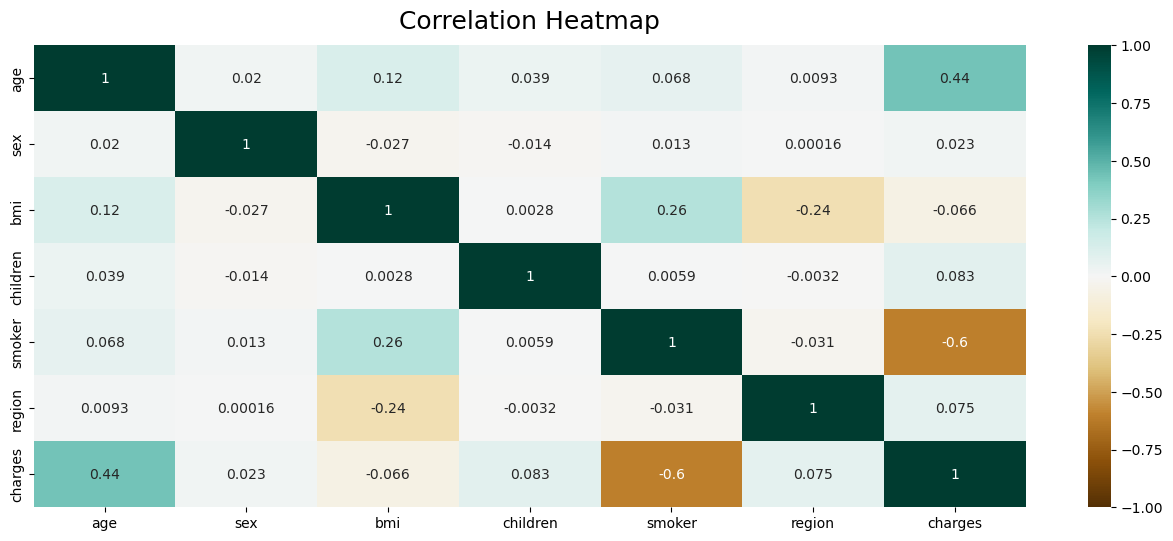

In [79]:
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(final2_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize" : 18}, pad = 12);

In [80]:
# the analysis shows how there is a low correletabion between the different elements

# Data Visualization

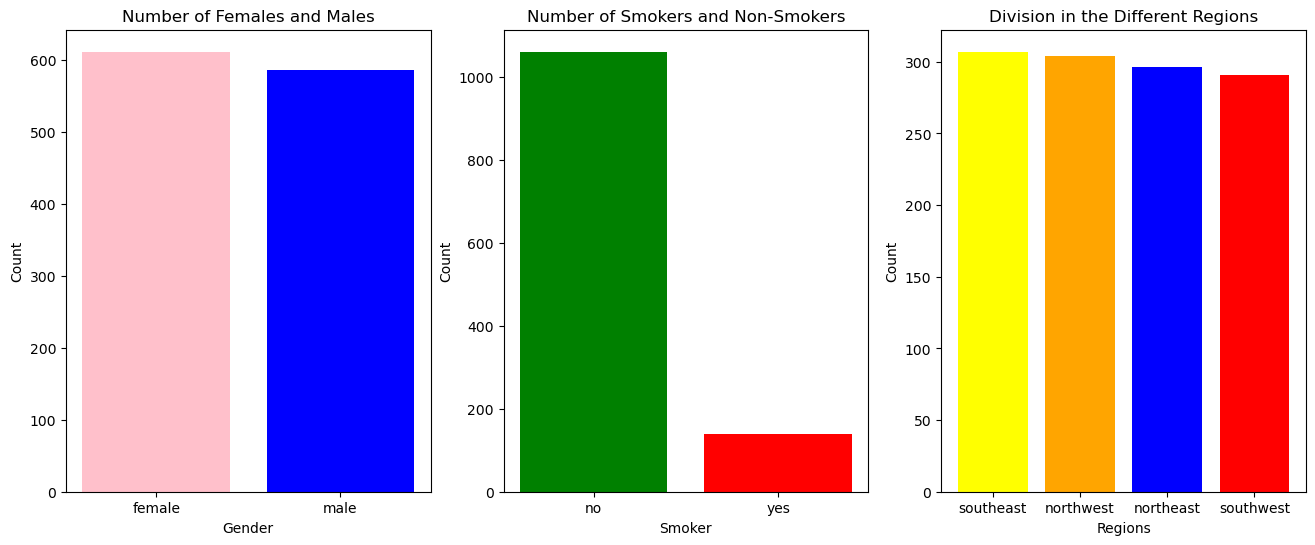

In [84]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.bar(counts_sex2.index, counts_sex2.values, color = ["pink", "blue"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Females and Males")

plt.subplot(1, 3, 2)
plt.bar(counts_smoker2.index, counts_smoker2.values, color = ["green", "red"])
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Number of Smokers and Non-Smokers")

plt.subplot(1, 3, 3)
plt.bar(counts_region2.index, counts_region2.values, color = ["yellow", "orange", "blue", "red"])
plt.xlabel("Regions")
plt.ylabel("Count")
plt.title("Division in the Different Regions")

plt.show()

Text(0, 0.5, 'Charges')

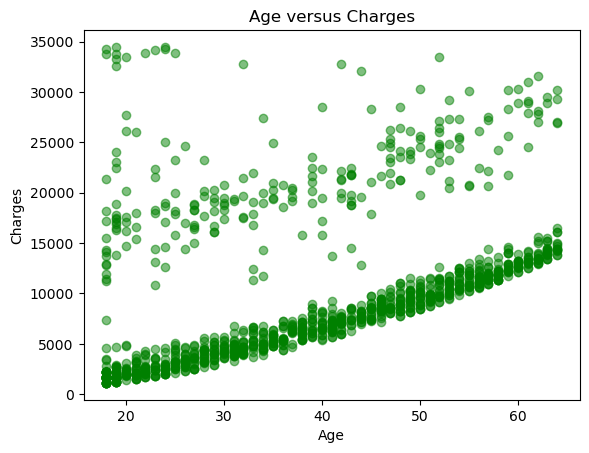

In [86]:
plt.scatter(final2_df["age"], final2_df["charges"], alpha = 0.5, color = "green")
plt.title("Age versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")